In [ ]:
# using 'shop_all_history.csv i want to find how many users with different devices shop had per week
# and evaluate whether the number of additions to the cart depends on the number of unique users

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

In [ ]:
# reading xlsx file
# all data is in one column
df = pd.read_excel('shop_all_history.xlsx')
df.shape

(748134, 1)

In [4]:
# here i made new df with splitting data by ','
df2 = pd.DataFrame(df.iloc[:,0].str.split(',').values.tolist())
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,4214259466202417480,1476492957,2020-10-14 00:00:00+00:00,desktop,False,Windows,Internet Explorer,United States,not available in demo dataset,ask,organic,(not set),0,1.0,2.0,2.0,16.0,0.0,0.0
1,3541738396641160713,1493611205,2021-04-30 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0,0.0
2,8276557623242379934,1490071147,2021-03-20 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Brisbane,ask,organic,(not set),0,1.0,2.0,2.0,16.0,0.0,0.0
3,5855313117666192014,1491048053,2021-04-01 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Sydney,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0,0.0
4,2619633492044211273,1495292376,2021-05-20 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,15.0,12.0,326.0,1.0,1.0


In [5]:
# giving names to columns
columns = ['fullVisitorId','visitStartTime','date','deviceCategory',
           'isMobile','operatingSystem','browser','country','city','trafficSource',
           'trafficMedium','trafficCampaign','isFirstVisit','totalVisits','totalHits',
           'totalPageviews','totalTimeOnSite','productPagesViewed','addedToCart']
df2.columns = columns
df = df2


In [15]:
df.head()

,fullVisitorId,visitStartTime,date,deviceCategory,isMobile,operatingSystem,browser,country,city,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart,weekly_date
0,4214259466202417480,1476492957,2020-10-14 00:00:00+00:00,desktop,False,Windows,Internet Explorer,United States,not available in demo dataset,ask,organic,(not set),0,1.0,2.0,2.0,16.0,0.0,0.0,2020-10-12 00:00:00+00:00
1,3541738396641160713,1493611205,2021-04-30 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0,0.0,2021-04-26 00:00:00+00:00
2,8276557623242379934,1490071147,2021-03-20 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Brisbane,ask,organic,(not set),0,1.0,2.0,2.0,16.0,0.0,0.0,2021-03-15 00:00:00+00:00
3,5855313117666192014,1491048053,2021-04-01 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Sydney,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0,0.0,2021-03-29 00:00:00+00:00
4,2619633492044211273,1495292376,2021-05-20 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,15.0,12.0,326.0,1.0,1.0,2021-05-17 00:00:00+00:00


In [6]:
# since date is by day i need to find weeks
df['date'] = pd.to_datetime(df['date'])
df['weekly_date'] = df['date'] - df['date'].dt.weekday.apply(timedelta)

In [7]:
# unique users by device weekly
df_weekly_uniqs = df.groupby(['weekly_date', 'deviceCategory'], as_index=False)[['fullVisitorId']].nunique()
# .nunique() is agg function that returns counts of unique elements
df_weekly_uniqs = df_weekly_uniqs.rename(columns={'fullVisitorId': 'unique_users'})
df_weekly_uniqs

,weekly_date,deviceCategory,unique_users
0,2020-07-27 00:00:00+00:00,desktop,2776
1,2020-07-27 00:00:00+00:00,mobile,532
2,2020-07-27 00:00:00+00:00,tablet,89
3,2020-08-03 00:00:00+00:00,desktop,12355
4,2020-08-03 00:00:00+00:00,mobile,2276
...,...,...,...
130,2021-05-24 00:00:00+00:00,mobile,3348
131,2021-05-24 00:00:00+00:00,tablet,483
132,2021-05-31 00:00:00+00:00,desktop,1432
133,2021-05-31 00:00:00+00:00,mobile,531


In [8]:
# taking only mobile users
df_wu_mobile = df_weekly_uniqs[df_weekly_uniqs['deviceCategory'] == 'mobile']
df_wu_mobile.sort_values('unique_users', ascending=False).head(5)

,weekly_date,deviceCategory,unique_users
61,2020-12-14 00:00:00+00:00,mobile,4539
118,2021-04-26 00:00:00+00:00,mobile,4504
58,2020-12-07 00:00:00+00:00,mobile,4006
127,2021-05-17 00:00:00+00:00,mobile,3983
76,2021-01-18 00:00:00+00:00,mobile,3937


<Axes: xlabel='weekly_date', ylabel='unique_users'>

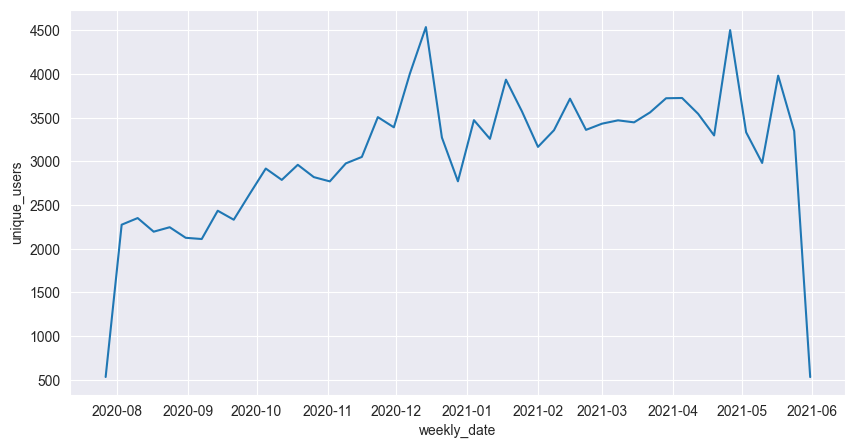

In [9]:
# making line chart
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.lineplot(data=df_wu_mobile, x='weekly_date', y='unique_users')

<Axes: xlabel='weekly_date', ylabel='unique_users'>

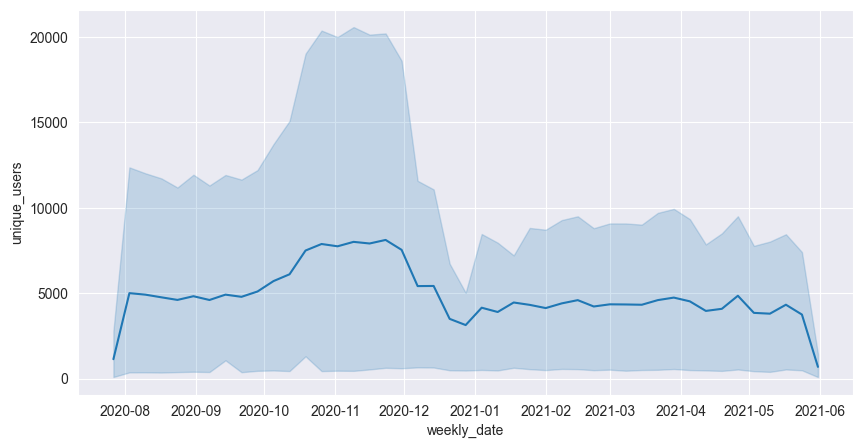

In [10]:
# if i dont filter by device line chart will look like this
plt.figure(figsize=(10, 5))
sns.lineplot(df_weekly_uniqs, x='weekly_date', y='unique_users')

In [11]:
# that line is mean number of users per each device
# shadow is confidence interval between each device type

<Axes: xlabel='weekly_date', ylabel='unique_users'>

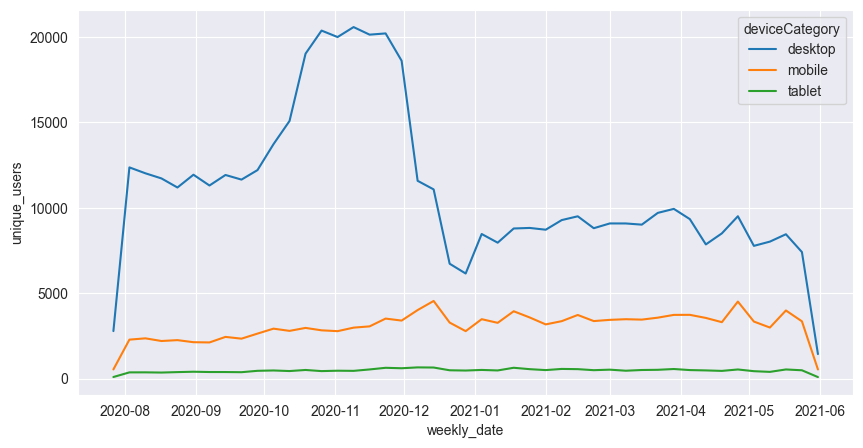

In [12]:
# i can also use ungrouped data (no specific device), but i can add lines for each device category
plt.figure(figsize=(10, 5))
sns.lineplot(df_weekly_uniqs, x='weekly_date', y='unique_users', hue='deviceCategory')

In [13]:
# now i need evaluate whether the number of additions to the cart depends on the number of unique users

In [21]:
df['addedToCart'].unique()

array(['0.0', '1.0', ''], dtype=object)

In [ ]:
# needed to fix empty space in column 'addedToCart
df['addedToCart'] = df['addedToCart'].replace('0', '0.0')

In [27]:
df['addedToCart'].unique()

array(['0.0', '1.0'], dtype=object)

In [28]:
df['addedToCart'] = df['addedToCart'].astype(float)

In [29]:
df.dtypes

fullVisitorId                      object
visitStartTime                     object
date                  datetime64[ns, UTC]
deviceCategory                     object
isMobile                           object
operatingSystem                    object
browser                            object
country                            object
city                               object
trafficSource                      object
trafficMedium                      object
trafficCampaign                    object
isFirstVisit                       object
totalVisits                        object
totalHits                          object
totalPageviews                     object
totalTimeOnSite                    object
productPagesViewed                 object
addedToCart                       float64
weekly_date           datetime64[ns, UTC]
dtype: object

In [ ]:
df_atc = df.groupby(['weekly_date', 'deviceCategory'], as_index=False)[['addedToCart']].sum()
df_atc

,weekly_date,deviceCategory,addedToCart
0,2020-07-27 00:00:00+00:00,desktop,258.0
1,2020-07-27 00:00:00+00:00,mobile,20.0
2,2020-07-27 00:00:00+00:00,tablet,8.0
3,2020-08-03 00:00:00+00:00,desktop,1032.0
4,2020-08-03 00:00:00+00:00,mobile,146.0
...,...,...,...
130,2021-05-24 00:00:00+00:00,mobile,163.0
131,2021-05-24 00:00:00+00:00,tablet,15.0
132,2021-05-31 00:00:00+00:00,desktop,135.0
133,2021-05-31 00:00:00+00:00,mobile,19.0


In [35]:
df_report = df_weekly_uniqs.merge(df_atc, on=('weekly_date', 'deviceCategory'))
df_report

,weekly_date,deviceCategory,unique_users,addedToCart
0,2020-07-27 00:00:00+00:00,desktop,2776,258.0
1,2020-07-27 00:00:00+00:00,mobile,532,20.0
2,2020-07-27 00:00:00+00:00,tablet,89,8.0
3,2020-08-03 00:00:00+00:00,desktop,12355,1032.0
4,2020-08-03 00:00:00+00:00,mobile,2276,146.0
...,...,...,...,...
130,2021-05-24 00:00:00+00:00,mobile,3348,163.0
131,2021-05-24 00:00:00+00:00,tablet,483,15.0
132,2021-05-31 00:00:00+00:00,desktop,1432,135.0
133,2021-05-31 00:00:00+00:00,mobile,531,19.0


In [37]:
# here im finding sum of unique users (across all devices)
df_report_sum = df_report.groupby('weekly_date', as_index=False).agg('sum')
df_report_sum.head()

,weekly_date,deviceCategory,unique_users,addedToCart
0,2020-07-27 00:00:00+00:00,desktopmobiletablet,3397,286.0
1,2020-08-03 00:00:00+00:00,desktopmobiletablet,14991,1197.0
2,2020-08-10 00:00:00+00:00,desktopmobiletablet,14723,1351.0
3,2020-08-17 00:00:00+00:00,desktopmobiletablet,14256,1177.0
4,2020-08-24 00:00:00+00:00,desktopmobiletablet,13801,1103.0


<Axes: xlabel='weekly_date', ylabel='unique_users'>

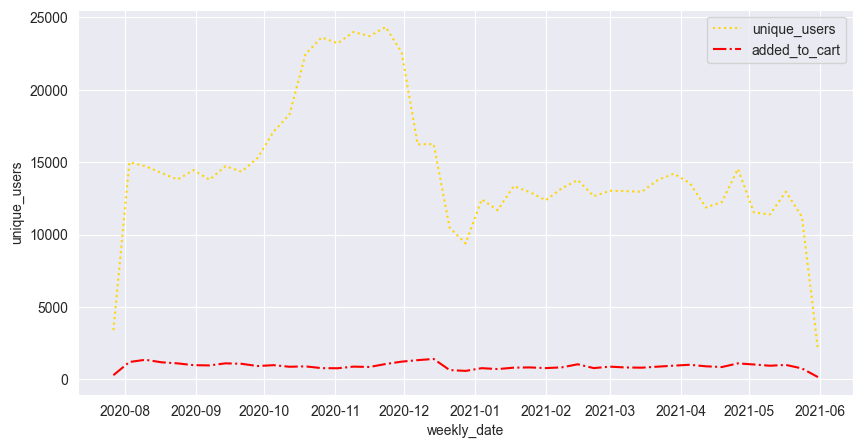

In [54]:
# i can add multiple lines on the chart, need to write them in one box?
# also i can set colours by the name or by hex
# and change line style
plt.figure(figsize=(10, 5))
sns.lineplot(df_report_sum, x='weekly_date', y='unique_users', color="#ffd504", label='unique_users', linestyle=':')
sns.lineplot(df_report_sum, x='weekly_date', y='addedToCart', color='red', label='added_to_cart', linestyle='-.')